# COGS 108 Project - Health Inspection

# Names & Github Username

- Name: Johnny Tran
- GH: A15506891

# Overview

Using collected data on Yelp ratings, income, and demographic within a general zip code area, I predict whether a program can determine the outcome of a health inspection test for restaurants in an area. I generated graphs that detail those factors then generated a predictive model of those factors to predict inspection scores. In the end, it concluded that Yelp review has a huge correlation while demographic and income of the area doesn't.

# Research Question

Can factors such Yelp ratings, income, and demographic within general zip code areas predict health inspection score within a general area?

## Background and Prior Work

**Background**:
    Lower rated restaurants tend to have a lot of negative reviews. In turn, these negative reviews could potentially correlated to violations that could be found within those restaurants. If a collective amount of reviews demonstrate similar negative features of a restaurant, that feature could be the result of a violation that leads to a poor health inspection. Also, within society there are speculations that poorer areas have less safe practices in restaurants, and in turn, would be throught to have lower inspection scores.
    
**Prior Work**:
    Two references/projects that discussed this topic are "Using Yelp data to predict restaurant inspection failure: a ‘voter of voters’ ensemble approach" and "Inspection Frequency, Sociodemographic Factors, and Food Safety Violations in Chain and Nonchain Restaurants, Philadelphia, Pennsylvania, 2013-2014".

    In the first reference, they use data and machine learning to predict whether a restaurant would fail a health inspection based on their Yelp reviews. With this, he studies the reviews by looking for certain words/descriptions to predict features of the restaurants. These features will then contribute to associating the resturant into one of the 3 categories: minor, significant, and crucial health hazards. Where if a restaurant falls into one of the last 2 categories, they'd be predicted to fail a health inspection. With this, the reviews will be read by the machine and predict poor safety procedures within the restaurant and predict if that restuarant would fail a health inspection or not.
    
    In the second reference, they study whether factors such as sociodemographic background of a neighborhood plays a factor in the health inspection scores within the area. They split their study between chain and non-chain restaurants, where chain restaurants tend to have more safe practices because the food production process requires less preparation compared to non-chain restaurants. As a result, with more preparations needed, the risk of health violations increase. As a result, their research then tries to correlate those restaurants health violations and the spread of food-borne illnesses to sociodemographic factors.
    
*References*: 
    1. https://medium.com/@jashkina/i-used-yelp-to-predict-whether-a-restaurant-will-fail-safety-inspections-1ca5b82ef06f
    2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/


# Hypothesis


A lower Yelp rating generally indicates a common problem found amongst reviews which potentially indicates a health violation found. Alongside this, there is a posibillity that minority and lower-income groups would receive harsher inspections through the mindset that they're expected to have *dirtier* safety practices. My hypothesis is that if a zipcode area's Yelp rating is lower and is associated with lower-income or non-white demographics, the general health inspection score would be lower.

# Data

**Datasets**: zipcodes.csv, yelp.csv, inspections.csv
    
    yelp.csv: 
        - 3689 observations
        - This data contains every restaurant and reports their Yelp rating, amount of ratings, details about of their 
        location, and types of foods served. 
        - Variables I will use: zip_code, rating, review_count
        - Other variables: id, address1, is_closed, name, latitude, longitude, price, phone, hotdogs, sandwiches, pizza, 
        tradamerican, burgers, mexican, grocery, breakfast_brunch, coffee, chinese, italian, newamerican, chicken_wings, delis, 
        bars, salad, seafood, bbq, bakeries, sushi
        
    zipcodes.csv:
        - 38 observations
        - This data contains general information about zip code and the area's income and demographic.
        - Variables I will use: zip, median_family_income_dollars, median_household_income_dollars, 
        percent_families_below_poverty_line, percent_nonwhite
        - Other variables: per_capita_income_dollars, percent_snap_benefits,percent_supplemental_security_income
        
    inspections.csv:
        - 18466 observations
        - This data contains information of health violations reported throughout restaurant inspections.
        - Variables I will use: zip, score, critical, description
        - Other variables: hsisid, date, name, address1, address2, city, state, postalcode, phonenumber, restaurantopendate, 
        days_from_open_date, facilitytype, x, y, geocodestatus, type, inspectedby, inspection_num, inspector_id, 
        previous_inspection_date, days_since_previous_inspection, previous_inspection_by_same_inspector, num_critical, 
        num_non_critical, num_critical_previous, num_non_critical_previous, num_critical_mean_previous, 
        num_non_critical_mean_previous, avg_neighbor_num_critical, avg_neighbor_num_non_critical, top_match, second_match

# Set Up

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
yelp_df = pd.read_csv('data/yelp.csv')
zipcodes_df = pd.read_csv('data/zipcodes.csv')
inspections_df = pd.read_csv('data/inspections.csv')

# Data Analysis

### Data Cleaning

In [3]:
yelp_df = yelp_df[['zip_code', 'rating', 'review_count']]
zipcodes_df = zipcodes_df.drop(columns=['per_capita_income_dollars', 'percent_snap_benefits','percent_supplemental_security_income'])
inspections_df = inspections_df[['zip', 'score', 'critical', 'description']]

In [4]:
zipcodes_df = zipcodes_df.rename(columns={'percent_damilies_below_poverty_line':'percent_families_below_poverty_line'})

In [5]:
yelp_df = yelp_df.sort_values(by=['zip_code'])
yelp_df = yelp_df.reset_index(drop=True)


In [6]:
inspections_df = inspections_df.sort_values(by=['zip'])
inspections_df = inspections_df.reset_index(drop=True)

In [7]:
yelp_df = yelp_df.loc[(yelp_df['zip_code'] == 27501) 
| (yelp_df['zip_code'] == 27502) 
| (yelp_df['zip_code'] == 27511) 
| (yelp_df['zip_code'] == 27513)
| (yelp_df['zip_code'] == 27518)
| (yelp_df['zip_code'] == 27519)
| (yelp_df['zip_code'] == 27520)
| (yelp_df['zip_code'] == 27522)
| (yelp_df['zip_code'] == 27523)
| (yelp_df['zip_code'] == 27526)
| (yelp_df['zip_code'] == 27529)
| (yelp_df['zip_code'] == 27539)
| (yelp_df['zip_code'] == 27540)
| (yelp_df['zip_code'] == 27545)
| (yelp_df['zip_code'] == 27560)
| (yelp_df['zip_code'] == 27562)
| (yelp_df['zip_code'] == 27571)
| (yelp_df['zip_code'] == 27587)
| (yelp_df['zip_code'] == 27591)
| (yelp_df['zip_code'] == 27592)
| (yelp_df['zip_code'] == 27596)
| (yelp_df['zip_code'] == 27597)
| (yelp_df['zip_code'] == 27601)
| (yelp_df['zip_code'] == 27603)
| (yelp_df['zip_code'] == 27604)
| (yelp_df['zip_code'] == 27605)
| (yelp_df['zip_code'] == 27606)
| (yelp_df['zip_code'] == 27607)
| (yelp_df['zip_code'] == 27608)
| (yelp_df['zip_code'] == 27609)
| (yelp_df['zip_code'] == 27610)
| (yelp_df['zip_code'] == 27612)
| (yelp_df['zip_code'] == 27613)
| (yelp_df['zip_code'] == 27614)
| (yelp_df['zip_code'] == 27615)
| (yelp_df['zip_code'] == 27616)
| (yelp_df['zip_code'] == 27617)
| (yelp_df['zip_code'] == 27703)]
yelp_df = yelp_df.reset_index(drop=True)

In [8]:
inspections_df = inspections_df.loc[(inspections_df['zip'] == 27501) 
| (inspections_df['zip'] == 27502) 
| (inspections_df['zip'] == 27511) 
| (inspections_df['zip'] == 27513)
| (inspections_df['zip'] == 27518)
| (inspections_df['zip'] == 27519)
| (inspections_df['zip'] == 27520)
| (inspections_df['zip'] == 27522)
| (inspections_df['zip'] == 27523)
| (inspections_df['zip'] == 27526)
| (inspections_df['zip'] == 27529)
| (inspections_df['zip'] == 27539)
| (inspections_df['zip'] == 27540)
| (inspections_df['zip'] == 27545)
| (inspections_df['zip'] == 27560)
| (inspections_df['zip'] == 27562)
| (inspections_df['zip'] == 27571)
| (inspections_df['zip'] == 27587)
| (inspections_df['zip'] == 27591)
| (inspections_df['zip'] == 27592)
| (inspections_df['zip'] == 27596)
| (inspections_df['zip'] == 27597)
| (inspections_df['zip'] == 27601)
| (inspections_df['zip'] == 27603)
| (inspections_df['zip'] == 27604)
| (inspections_df['zip'] == 27605)
| (inspections_df['zip'] == 27606)
| (inspections_df['zip'] == 27607)
| (inspections_df['zip'] == 27608)
| (inspections_df['zip'] == 27609)
| (inspections_df['zip'] == 27610)
| (inspections_df['zip'] == 27612)
| (inspections_df['zip'] == 27613)
| (inspections_df['zip'] == 27614)
| (inspections_df['zip'] == 27615)
| (inspections_df['zip'] == 27616)
| (inspections_df['zip'] == 27617)
| (inspections_df['zip'] == 27703)]
inspections_df = inspections_df.reset_index(drop=True)

## Plotting

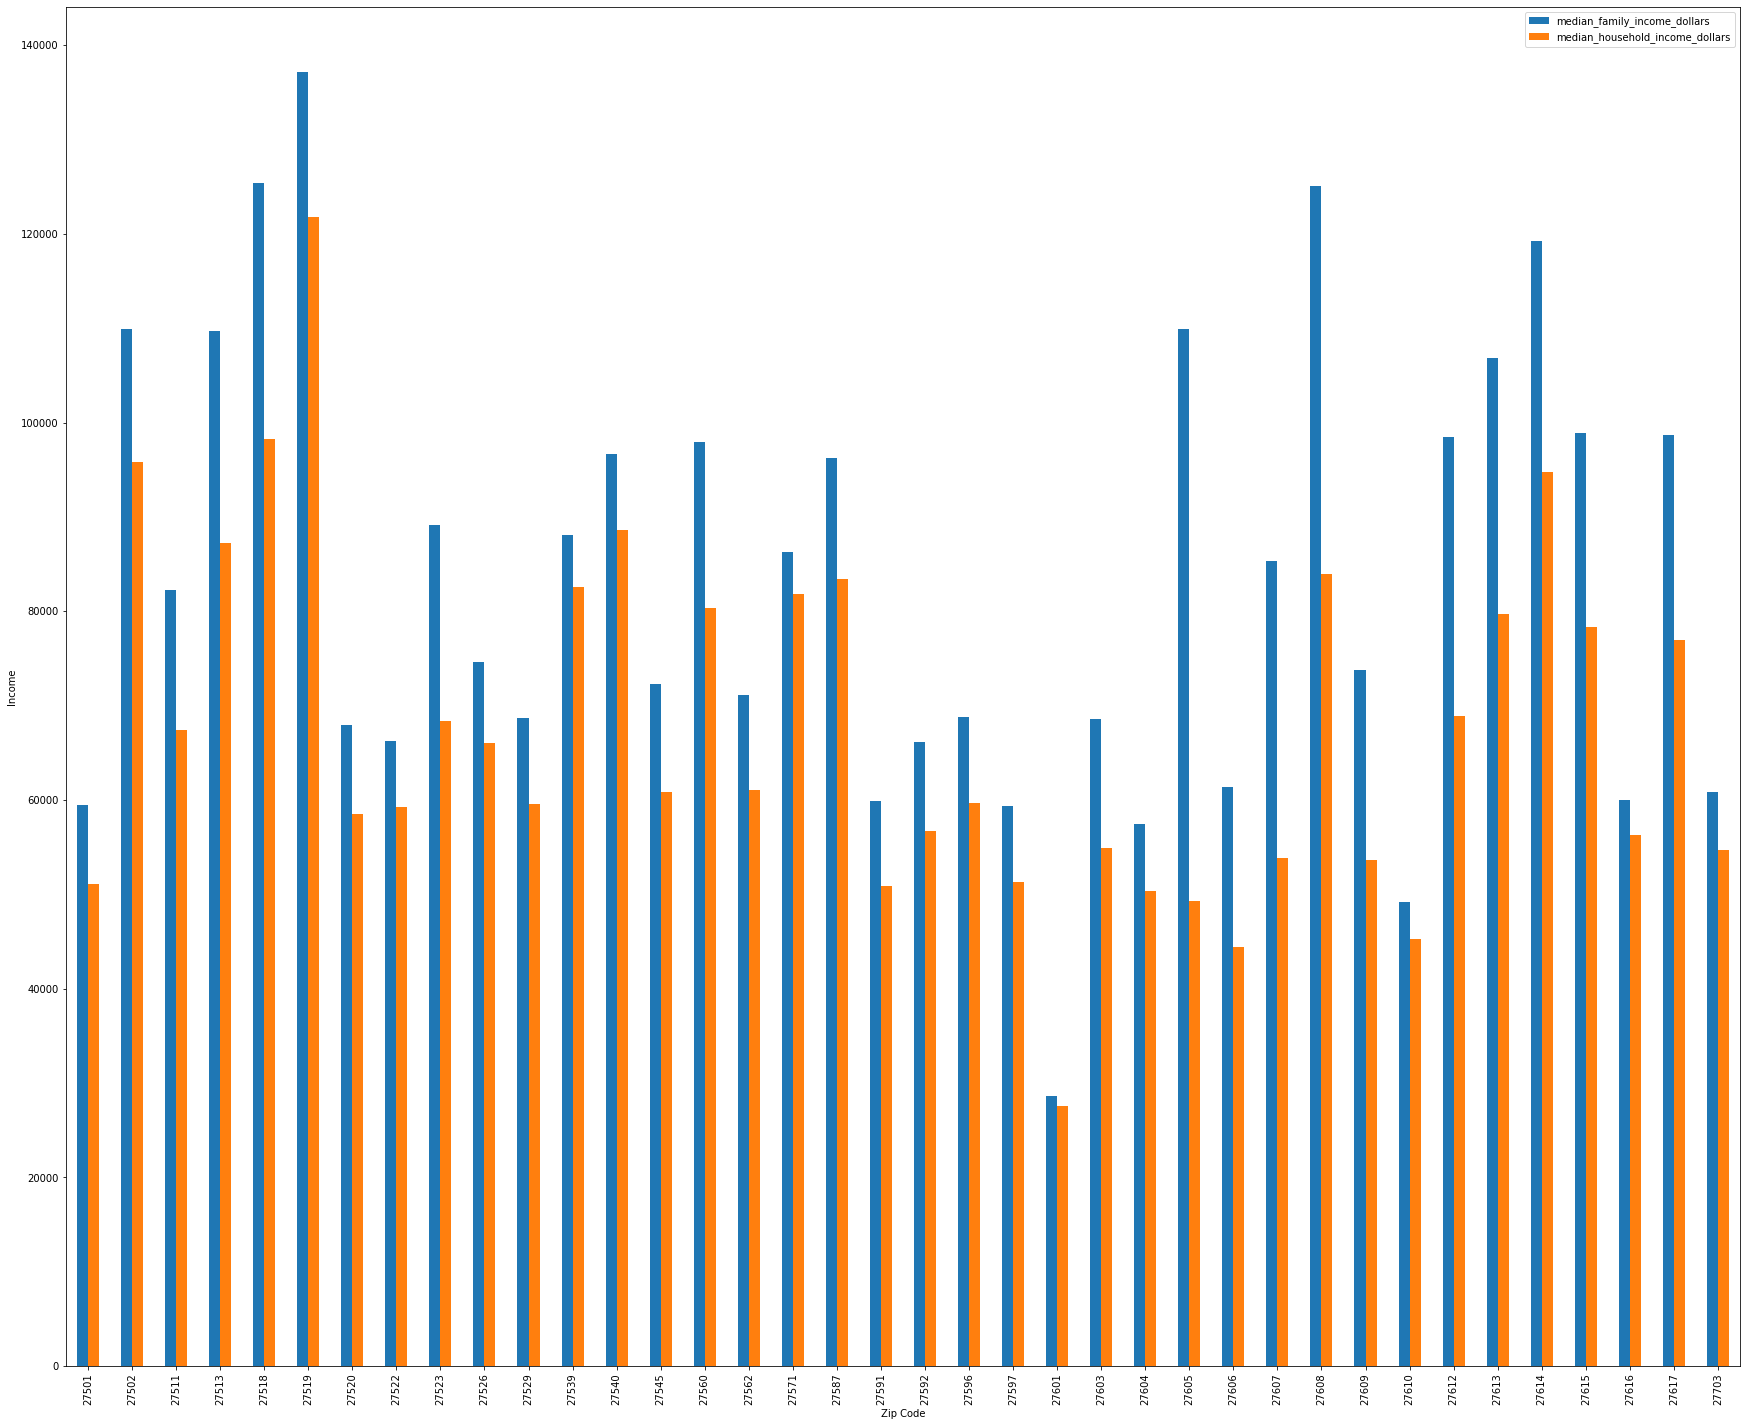

In [9]:
zip_income_bar = zipcodes_df[['median_family_income_dollars','median_household_income_dollars']]
zip_income_bar = zip_income_bar.set_index(zipcodes_df['zip'])

f1 = zip_income_bar.plot.bar(figsize=(30,25))
f1 = plt.xlabel('Zip Code')
f1 = plt.ylabel('Income')
f1 = plt.rcParams.update({'font.size': 20})
f1 = plt.gcf()

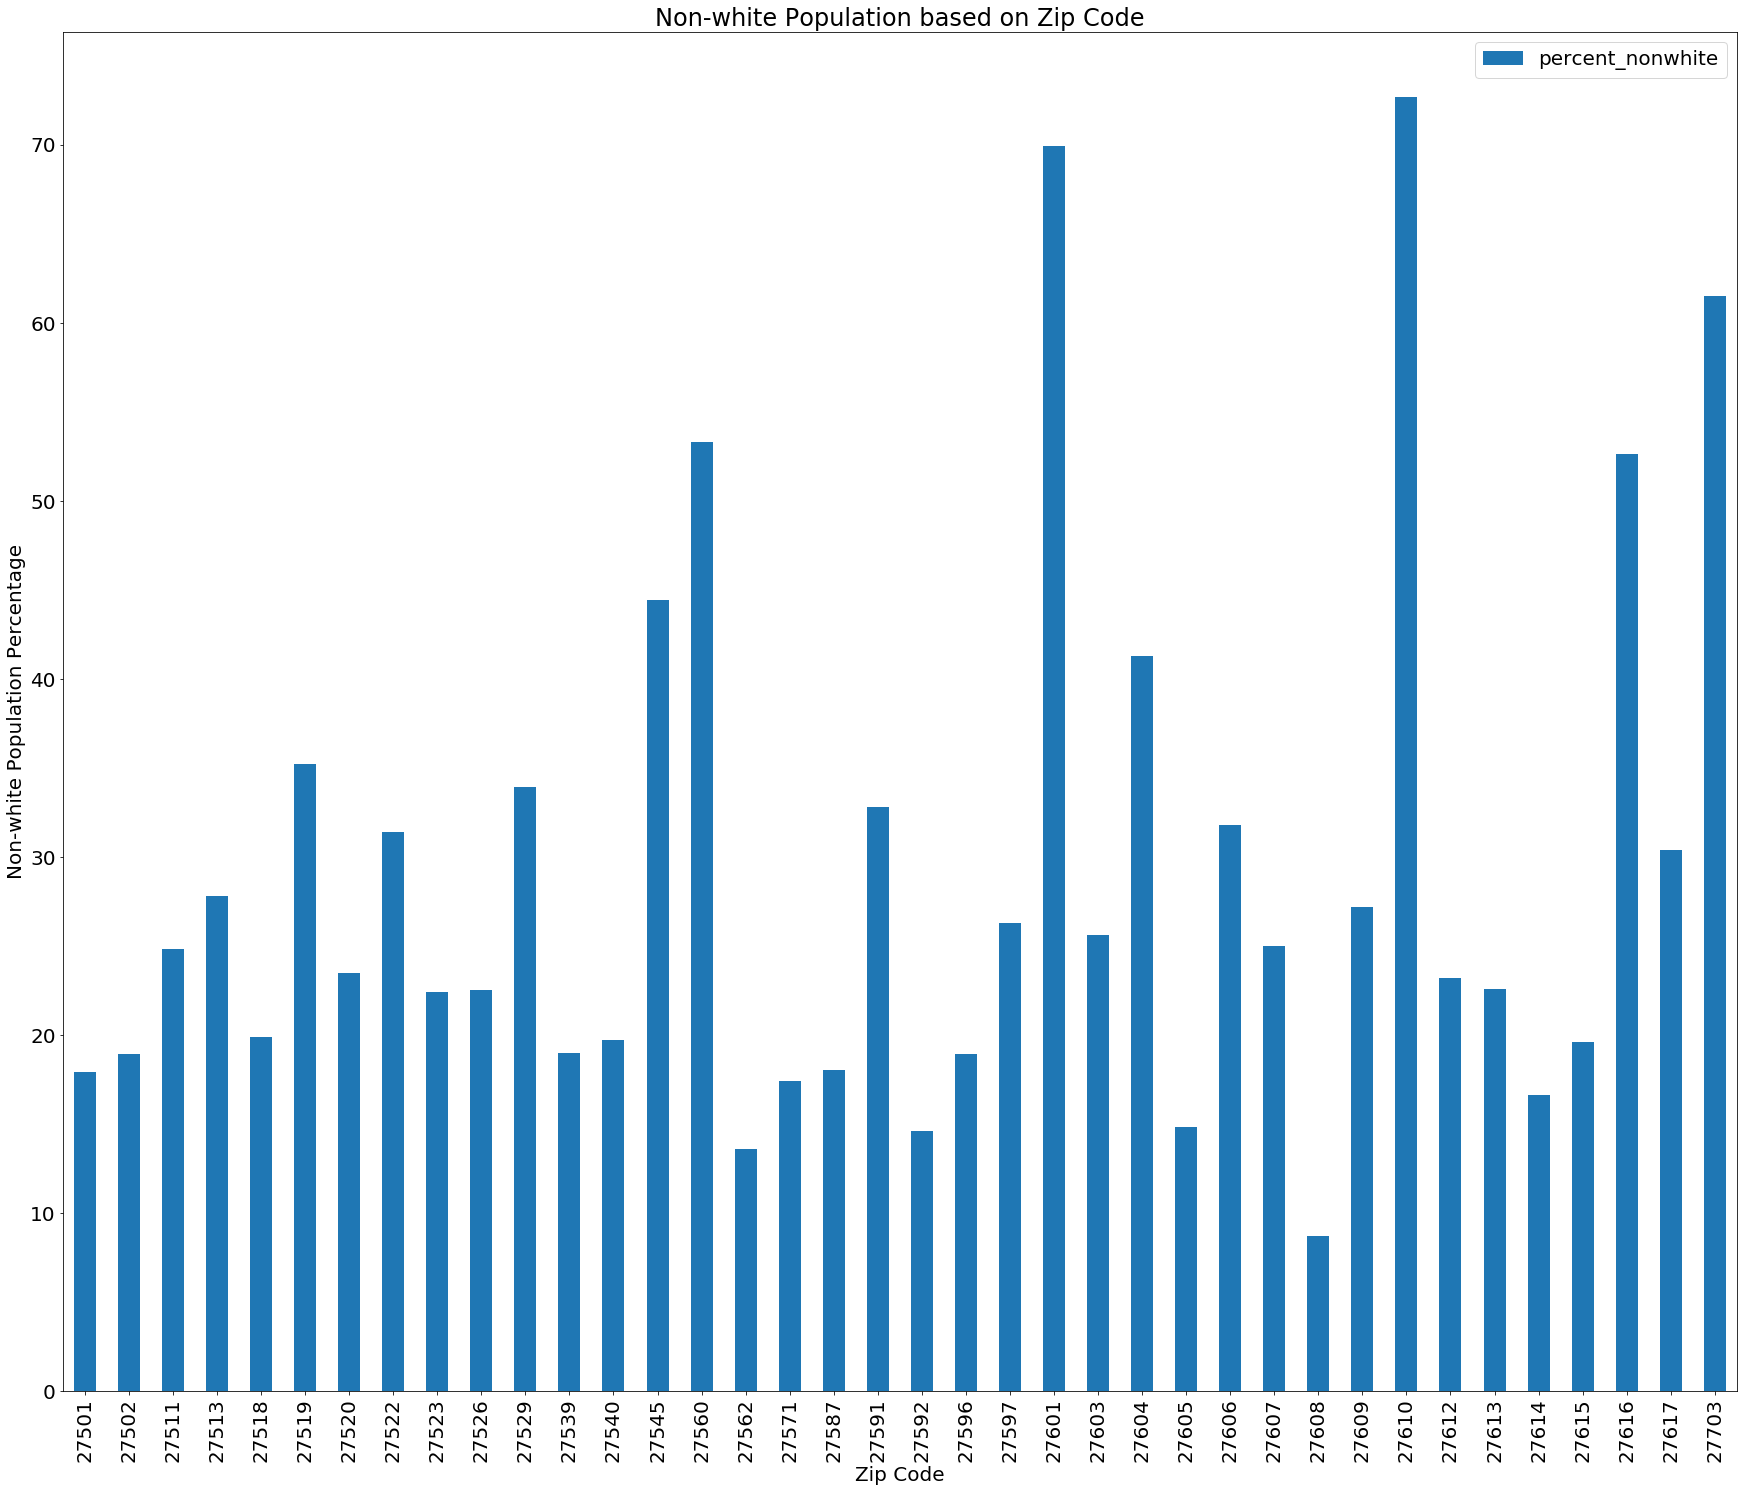

In [10]:
zip_nonwhite_bar = zipcodes_df[['percent_nonwhite']]
zip_nonwhite_bar = zip_nonwhite_bar.set_index(zipcodes_df['zip'])

f2 = zip_nonwhite_bar.plot.bar(figsize=(30,25))
f2 = plt.rcParams.update({'font.size': 20})
f2 = plt.xlabel('Zip Code')
f2 = plt.ylabel('Non-white Population Percentage')
f2 = plt.title('Non-white Population based on Zip Code')
f2 = plt.gcf()

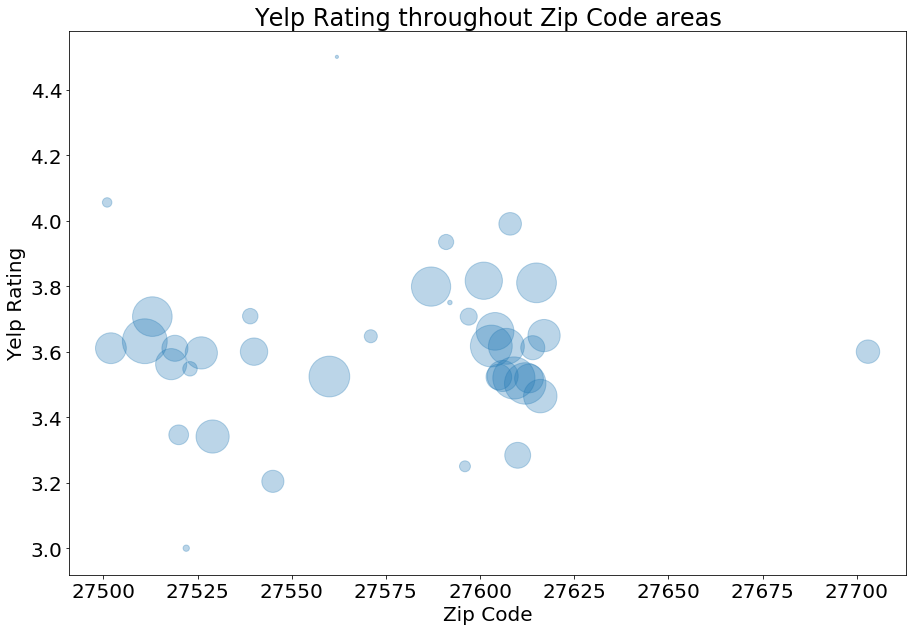

In [11]:
yelp_bar = zipcodes_df[['zip']]
yelp_bar['mean'] = pd.Series()
yelp_bar['count'] = pd.Series()
for i in range(len(zipcodes_df['zip'])):
    yelp_bar['mean'][i] = yelp_df.loc[yelp_df['zip_code']==zipcodes_df['zip'][i]]['rating'].mean()
    yelp_bar['count'][i] = yelp_df.loc[yelp_df['zip_code']==zipcodes_df['zip'][i]]['rating'].count()

f3 = plt.figure(figsize=(15, 10))
f3 = plt.scatter(yelp_bar['zip'], yelp_bar['mean'],s=yelp_bar['count']*10,alpha=0.3)
f3 = plt.xlabel('Zip Code')
f3 = plt.ylabel('Yelp Rating')
f3 = plt.title('Yelp Rating throughout Zip Code areas')
f3 = plt.gcf()

## Data Explanation

For the graphs above, I've generated graphs containing information for income, yelp ratings, and non-white population percentage for zip codes only available in the zipcodes.csv file. With this, I can graph and study information containing for those certain zip codes, allowing for me to understand the demographic and general rating for restaurants within the area. Looking at the first graph, we can see that there is a correlation between family income and household income within each zip code area. And in those areas, we can see that higher income likely correlates a higher population of whites in the area which is seen in the second graph.

Following those graphs, I then used information from yelp.csv to generate a scatter plot of yelp ratings within a zip code area. To do this, I calculated the average yelp rating across restaurants in the area by taking the mean of all yelp reviews correlating to zip codes in zipcodes.csv. Along with this, the amount of reviews given within the area strengthens the circles on the scatter plot. Doing this, we are able to visualize the general yelp ratings within general areas to understand the people's view on the restaurant in that area. 

Looking at the graphs, we can't conclude if there is a correlation between the income/demographic of an area with the yelp rating given to restaurants. Which is why to explore this, I will then generate a perdictive model to predict whether there is a correlation between yelp reviews, area demographic, and income within an area, and whether those factors play a role in determining the general score for health inspection of the area.

In [12]:
df = zipcodes_df[['zip','median_family_income_dollars','median_household_income_dollars','percent_nonwhite']]
df['inspection_score'] = pd.Series()
for i in range(len(df['zip'])):
    df['inspection_score'][i] = inspections_df.loc[inspections_df['zip']==df['zip'][i]]['score'].mean()
df['critical'] = inspections_df['critical']
df['yelp_rating'] = yelp_bar['mean']
df['yelp_rating_count'] = yelp_bar['count']

In [13]:
outcome_1, predictors_1 = patsy.dmatrices('inspection_score ~ yelp_rating + median_family_income_dollars + median_household_income_dollars + percent_nonwhite', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       inspection_score   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     4.140
Date:                Sat, 06 Jun 2020   Prob (F-statistic):            0.00817
Time:                        17:56:56   Log-Likelihood:                -35.047
No. Observations:                  37   AIC:                             80.09
Df Residuals:                      32   BIC:                             88.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

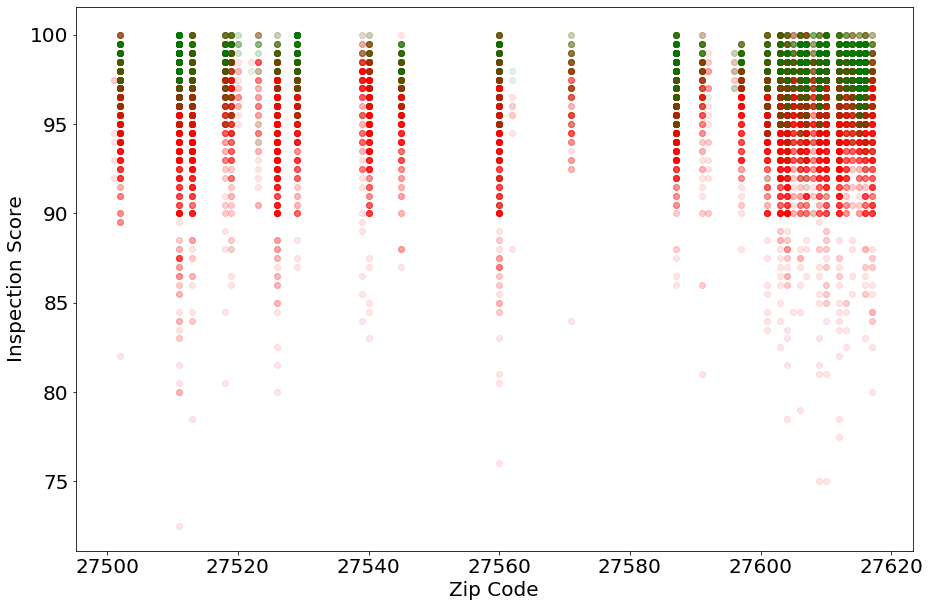

In [14]:
inspections_iscritical = inspections_df.loc[inspections_df['critical'] == 1]
inspections_notcritical = inspections_df.loc[inspections_df['critical'] == 0]
f4 = plt.figure(figsize=(15, 10))
f4 = plt.scatter(inspections_iscritical['zip'], inspections_iscritical['score'],c='red',alpha=0.1)
f4 = plt.scatter(inspections_notcritical['zip'], inspections_notcritical['score'],c='green',alpha=0.1)
f4 = plt.xlabel('Zip Code')
f4 = plt.ylabel('Inspection Score')
f4 = plt.gcf()

From the predictive model, Yelp Ratings can indeed predict inspection scores, the factors median family income dollars, median household income dollars, and population percentage of non-whites cant. This is because Yelp ratings has p-value of 0 while the other factors has p-value greater than 0.01, indicating they had no predictive values. Which is why, looking at the last graph the generates information of inspection scores within a general zip code area, where a red dot indicates a critical inspection and a green dot indicates a non-critical inspection, and the opacity indicates a higher volume of inspections within the area. With this, we can view this graph alongside the Yelp rating graphs for zip code areas and see that in zip code areas that gnerally have a lower Yelp rating has more red dots, indicating a critical health inspection, thus a lower health inspection score. As a result, my predictive data can be seen through these two graphs and show that there is a correlation to Yelp ratings and inspection scores.

# Ethics & Privacy

An issue within this conclusion is that because Yelp ratings are indictive of inspection scores within an area, it would leave many restaurants within zip code areas vulnerable and targets of inspections if the overall Yelp rating of the area is low. With this, it would cost many restaurants in the area lots of pressure and resources in preparing for inspections. As a result, restaurants that follow the rules in an area with a low Yelp rating score would be unfairly targetted for inspection and lose resources in the end in the expense of those not following the rules. Whereas restaurants that don't follow the rules of health violations could be left unchecked just because their area's yelp reviews are high. As a result, it potentially makes it unfair for restaurants to be generalized for their area's Yelp scores.

Another issue that could arise from this is that Yelp reviews don't simply consist of reviews concerning lack of safety practices in restaurants but also factors features within the restaurant like taste of the food, dining experience, service, etc. As a result, some restaurants might be targeted for inspection because of low Yelp ratings simply based on the score and not why the score was given. And thus, restaurants might be targetted for the wrong reasons, causing them to again, lose money and other resources.

# Conclusion & Discussion

Following the predictive model, it was able to confirm that there is indeed a correlation between Yelp Ratings and determining health inspection scores within a general area. We can see this as the model's p-value for Yelp Ratings on predicting health inspection score was 0, indicating it was very highly correlated. However, looking at the predictive model, we can also conclude that there is no correlation between demographic and income of an area to the inspection score that would be given to restaurants in an area. As a result, we can't conclude that demographics and income determine the overall safety practices and health concerns within restaurants as demographic and income has no correlation to what a restaurant practices. Which is why, people shouldn't and can't determine the conditions of a restaurant simply based on what kind of demographic or socioeconomic background it caters towards, and instead the safety of a restaurant is determines through the practices it hold.

As a results, based on the data, the practice of safety procedures within restaurants are indictive of Yelp reviews because reviews tend to be based on the restaurant experience overall, which include the practices held within a restaurants, where naturally a restaurant that doesn't practice safe restaurant procedures will result in a lower Yelp rating and in turn have violations that would score in a low health inspection. Thus, while it can't completely predict that there are poor safety practices in a restaurant, we can infer that something isn't going right within the restaurant if their Yelp rating is low and should be inspected.